In [20]:
df['40 Yard Dash'] = pd.to_numeric(df['40 Yard Dash'], errors='coerce')


In [36]:
print(df.columns)

Index(['Name', 'Position', 'School', 'Height', 'Weight', 'Hand Size',
       'Arm Length', 'Wingspan', '40 Yard Dash', 'Bench Press',
       'Vertical Jump', 'Broad Jump', '3-Cone Drill', '20 Yard Shuttle',
       'Athleticism Score', 'Height (Numeric)', 'Hand (Numeric)',
       'Arm (Numeric)', 'Wingspan (Numeric)'],
      dtype='object')


In [42]:
import pandas as pd

# Correct method for reading Excel files
df = pd.read_excel("C:\\Users\\noahk\\OneDrive\\Desktop\\CAPSTONE\\2025 NFL Combine Dataset.xlsx")

# Show the first few rows of the dataset to verify it's loaded
df.head()

,Name,Position,School,Height,Weight,Hand Size,Arm Length,Wingspan,40 Yard Dash,Bench Press,Vertical Jump,Broad Jump,3-Cone Drill,20 Yard Shuttle,Athleticism Score,Height (Numeric),Hand (Numeric),Arm (Numeric),Wingspan (Numeric)
0,BJ Adams,DB,UCF,6-2,182,8.75,31.75,NaN,4.53,NaN,32.5,9.750000,NaN,NaN,51,6.166667,8.75,31.75,NaN
1,Cam Jackson,DL,Florida,6-6 2/8,328,9.5,34.125,81.875,5.17,NaN,24.5,7.750000,NaN,NaN,51,6.520833,9.5,34.125,81.875
2,Gunnar Helm,TE,Texas,6-5,241,9.875,32.75,79.5,4.84,NaN,30.0,NaN,7.15,4.40,53,6,9.875,32.75,79.5
3,Zy Alexander,DB,LSU,6-1 3/8,187,9.25,31,77.5,4.56,NaN,31.5,9.666667,NaN,NaN,53,6.114583,9.25,31,77.5
4,Brandon Crenshaw-Dickson,OL,Florida,6-7 1/4,316,10.5,34,83.5,5.33,NaN,24.5,8.000000,8.15,4.91,54,6.604167,10.5,34,83.5


In [43]:
# Check the column names used during training
print(X_train.columns)

# Make sure new_player has the same columns
print(new_player.columns)


Index(['Weight', 'Bench Press', 'Vertical Jump', 'Broad Jump', '3-Cone Drill',
       '20 Yard Shuttle', 'Name_Aeneas Peebles', 'Name_Ahmed Hassanein',
       'Name_Aireontae Ersery', 'Name_Ajani Cornelius',
       ...
       'Wingspan (Numeric)_84.125', 'Wingspan (Numeric)_84.375',
       'Wingspan (Numeric)_84.5', 'Wingspan (Numeric)_84.75',
       'Wingspan (Numeric)_85', 'Wingspan (Numeric)_85.125',
       'Wingspan (Numeric)_88.25', 'Wingspan (Numeric)_--',
       'Wingspan (Numeric)_73 ', 'Wingspan (Numeric)_76 '],
      dtype='object', length=1078)
Index(['40 Yard Dash', 'Bench Press', 'Vertical Jump'], dtype='object')


In [45]:
X = df[['40 Yard Dash', 'Bench Press', 'Vertical Jump']]  # Features
y = df['Athleticism Score']  # Target (Success Score)


In [46]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


ValueError: could not convert string to float: '--'

In [48]:
# Check for non-numeric values in the dataset
print(df[df['40 Yard Dash'] == '--'])  # Replace with the column that has '--'


                Name Position         School   Height  Weight Hand Size  \
233    Ashton Jeanty       RB    Boise State  5-8 1/2     211      9.25   
234    Dylan Sampson       RB      Tennessee  5-8 1/8     200      8.75   
235     Cam Skattebo       RB  Arizona State  5-9 1/2     219     9.375   
236    LeQuint Allen       RB       Syracuse  6-0 1/8     204    10.125   
237   Kalel Mullings       RB       Michigan  6-1 1/2     226        10   
..               ...      ...            ...      ...     ...       ...   
309  Josaiah Stewart       DL       Michigan      6-1     249       9.5   
310   Bradyn Swinson       DL            LSU  6-3 5/8     255     9.875   
311         Jay Toia       DL           UCLA      6-2     342        10   
312     JT Tuimoloau       DL     Ohio State  6-4 2/8     265      10.5   
313    Shemar Turner       DL      Texas A&M  6-3 1/8     290     10.25   

    Arm Length Wingspan 40 Yard Dash  Bench Press  Vertical Jump  Broad Jump  \
233      29.25    7

In [49]:
df['40 Yard Dash'] = pd.to_numeric(df['40 Yard Dash'], errors='coerce')

In [50]:
print(df.dtypes)

Name                   object
Position               object
School                 object
Height                 object
Weight                  int64
Hand Size              object
Arm Length             object
Wingspan               object
40 Yard Dash          float64
Bench Press           float64
Vertical Jump         float64
Broad Jump            float64
3-Cone Drill          float64
20 Yard Shuttle       float64
Athleticism Score       int64
Height (Numeric)       object
Hand (Numeric)         object
Arm (Numeric)          object
Wingspan (Numeric)     object
dtype: object


In [51]:
# Convert columns to numeric and coerce errors to NaN
columns_to_convert = [
    'Height', 'Hand Size', 'Arm Length', 'Wingspan',
    'Height (Numeric)', 'Hand (Numeric)', 'Arm (Numeric)', 'Wingspan (Numeric)'
]

# Convert each column
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check if there are any NaN values
print(df.isnull().sum())


Name                    0
Position                0
School                  0
Height                325
Weight                  0
Hand Size               5
Arm Length              3
Wingspan               84
40 Yard Dash          123
Bench Press           261
Vertical Jump         118
Broad Jump            128
3-Cone Drill          252
20 Yard Shuttle       245
Athleticism Score       0
Height (Numeric)        2
Hand (Numeric)          5
Arm (Numeric)          51
Wingspan (Numeric)      6
dtype: int64


In [52]:
# Fill NaN values with the median of each column
df.fillna(df.median(), inplace=True)


TypeError: Cannot convert [['BJ Adams' 'Cam Jackson' 'Gunnar Helm' 'Zy Alexander'
  'Brandon Crenshaw-Dickson' 'Josh Kelly' 'Jamaree Caldwell'
  'Jay Higgins' 'Yahya Black' 'Bryson Nesbit' 'Cobee Bryant'
  'Tyler Booker' 'Theo Wease Jr.' 'Dorian Strong' 'JJ Pegues'
  'Ricky White III' 'Jaylin Smith' 'Konata Mumpfield' 'Jake Briningstool'
  'Upton Stout' 'Sebastian Castro' 'Power Echols' 'Nohl Williams'
  'Elijah Simmons' 'Shemar James' 'Kaleb Johnson' 'Tez Johnson'
  'Mello Dotson' 'Ulysses Bentley IV' 'Traeshon Holden' 'Kobe Hudson'
  'Antwane Wells Jr.' 'Clay Webb' 'Corey Kiner' 'Nick Nash'
  'Moliki Matavao' 'Gavin Bartholomew' 'Malaki Starks\xa0' 'Jah Joyner'
  'Bam Martin-Scott' 'Jalen Rivers' 'Xavier Truss' 'Pat Bryant'
  'Jimmy Horn Jr.' 'LaJohntay Wester' 'Bilhal Kone' 'Alijah Clark'
  'Aeneas Peebles' 'Tommy Akingbesote' 'Eric Gregory' 'Nazir Stackhouse'
  'Torricelli Simpkins III' 'Kyle Monangai' 'Kaden Prather' 'Trey Amos'
  'Isas Waxter' 'Princely Umanmielen' 'Joshua Farmer' 'Kyle Kennard'
  'Sean Martin' 'Joe Huber' 'Wyatt Milum' 'Jackson Hawes' 'Denzel Burke'
  'Rayuan Lane III' 'Quincy Riley' 'Junior Tafuna' 'Jeffrey Bassa'
  'Damien Martinez' 'Woody Marks' 'Tre Harris' 'Roc Taylor'
  'Joshua Simon' 'Robbie Ouzts' 'Robert Longerbeam' 'Marcus Harris'
  'Maxen Hook' 'Carson Bruener' 'Chris Paul Jr.' 'Anthony Belton'
  'Ollie Gordon II' 'Andrew Armstrong' "Da'Quan Felton" 'Dominic Lovett'
  'Andrew Mukuba' 'Mac McWilliams' 'Billy Bowman Jr.' 'Derrick Harmon'
  'Ahmed Hassanein' 'Demetrius Knight Jr.' 'Devin Neal' 'Mitchell Evans'
  'R.J. Mickens' 'James Pearce Jr.' 'Tyler Baron' 'Ozzy Trapilo'
  'Brashard Smith' 'RJ Harvey' 'Zah Frazier' 'Jaylen Reed'
  'Elijah Roberts' 'Francisco Mauigoa' 'Jarquez Hunter' 'Elijhah Badger'
  'Kyle Williams' 'Harold Fannin Jr.' 'Jason Marshall Jr.' 'Tyler Batty'
  'Fadil Diggs' 'Ethan Downs' 'John Williams' 'Thomas Fidone II'
  'Hunter Wohler' 'Jordan Burch' 'Antwaun Powell-Ryland' 'David Walker'
  'Kelvin Banks Jr.' 'Montrell Johnson Jr.' 'Isaiah Bond' 'Craig Woodson'
  'Darius Alexander\xa0' 'Barryn Sorrell' 'Danny Stutsman'
  'Raheim Sanders' 'Luther Burden III' 'Tory Horton' 'Jonas Sanker'
  'Justin Walley' 'Miles Frazier' 'Marcus Yarns' 'Elic Ayomanor'
  'KeAndre Lambert-Smith' 'Warren Brinson' 'Ty Robinson' 'Collin Oliver'
  'Connor Colby' 'Joshua Gray' 'Jordan Watkins' 'Teddye Buchanan'
  'Smael Mondon Jr.' 'Omarion Hampton' 'Bhayshul Tuten' 'Tahj Brooks'
  'Jalin Conyers' 'Jahdae Barron' 'Maxwell Hairston' 'Jihaad Campbell'
  'Nick Martin' 'Kain Medrano' 'DJ Giddens' 'Tai Felton'
  'Savion Williams' 'Terrance Ferguson' 'Jonah Savaiinaea' 'Jalen Royals'
  'Arian Smith' 'Marques Sigle' 'Shemar Stewart' 'Zeek Biggers'
  'Jared Harrison-Hunte' 'Logan Brown' 'Josh Conerly Jr.' 'Carson Vinson'
  'Jaydon Blue' 'CJ Dippre' 'Landon Jackson' 'CJ West' 'Eugene Asante'
  'Eli Cox' 'Drew Kendall' 'Chimere Dike' 'Matthew Golden'
  'Tyrion Ingram-Dawkins' 'Will Campbell' 'Aireontae Ersery'
  'Jalen Travis' "Dont'e Thornton Jr." 'Kitan Crawford' 'Trevor Etienne'
  'Sam Brown Jr.' 'Jayden Higgins' 'Jaylin Lane' 'Jacob Parrish'
  'Armand Membou' 'Jaylin Noel' 'Nick Emmanwori' 'Caleb Rogers'
  'TreVeyon Henderson' 'Quinshon Judkins' 'Donovan Edwards'
  'Caleb Ransaw' 'Darien Porter' 'Jackson Slater' 'Isaiah Neyor'
  'Isaac TeSlaa' 'Tate Ratledge' 'Jared Wilson' 'Hayden Conner'
  'Ajani Cornelius' 'Garrett Dellinger' 'Dylan Fairchild' 'Charles Grant'
  'Myles Hinton' 'Donovan Jackson' 'Emery Jones Jr.' 'Luke Kandra'
  'Chase Lundt' 'Jake Majors' 'Marcus Mbow' 'Seth McLaughlin'
  'Jonah Monheim' 'Jack Nelson' 'Hollin Pierce' 'Josh Simmons'
  'Marcus Tate' 'Branson Taylor' 'Cameron Williams' 'Grey Zabel'
  'Cam Ward' 'Shedeur Sanders' 'Jaxson Dart' 'Quinn Ewers' 'Kyle McCord'
  'Jalen Milroe' 'Dillon Gabriel' 'Tyler Shough' 'Will Howard'
  'Graham Mertz' 'Riley Leonard' 'Brady Cook' 'Max Brosmer'
  'Kurtis Rourke' 'Seth Henigan' 'Ashton Jeanty' 'Dylan Sampson'
  'Cam Skattebo' 'LeQuint Allen' 'Kalel Mullings' 'Phil Mafah'
  "Ja'Quinden Jackson" 'Jordan James' 'Jack Bech' "Ja'Corey Brooks"
  'Beaux Collins' 'Emeka Egbuka' 'Jacolby George' 'Travis Hunter'
  'Daniel Jackson' 'Bru McCoy' 'Tetairoa McMillan' 'Xavier Restrepo'
  'Colston Loveland' 'Tyler Warren' 'Elijah Arroyo' 'Mason Taylor'
  'Oronde Gadsden II' 'Brant Kuithe' 'Luke Lachey' 'Travis Hunter'
  'Will Johnson' 'Benjamin Morrison' 'Shavon Revel' "Azareye'h Thomas"
  'Kevin Winston Jr.' 'Xavier Watts' 'Lathan Ransom' 'Alijah Huzzie'
  'Malachi Moore' 'Jordan Hancock' 'Jermari Harris' 'Jabbar Muhammad'
  'Tommi Hill' "O'Donnell Fortune" 'Dante Trader Jr.' 'Malik Verdon'
  'Abdul Carter' 'Mason Graham' 'Jalon Walker' 'Mykel Williams'
  'Walter Nolen' 'Mike Green' 'Nic Scourton' 'Kenneth Grant'
  'Jack Sawyer' 'Omarr Norman-Lott' 'Donovan Ezeiruaku' 'Deone Walker'
  'Tyleik Williams' 'Yahya Black' 'Vernon Broughton' 'Alfred Collins'
  'Howard Cross III' 'Ashton Gillotte' 'Ty Hamilton' 'Tonka Hemingway'
  'Cam Horsley' 'Jared Ivey' "Sai'vion Jones" 'DeAndre Jules'
  'Steve Linton' 'Rylie Mills' 'Oluwafemi Oladejo' 'Payton Page'
  'Jordan Phillips' 'Jahvaree Ritzie' 'Que Robinson' 'Kaimon Rucker'
  'T.J. Sanders' 'Tim Smith' 'Josaiah Stewart' 'Bradyn Swinson'
  'Jay Toia' 'JT Tuimoloau' 'Shemar Turner' 'Barrett Carter'
  'Jamon Dumas-Johnson' 'Kobe King' 'Jack Kiser' 'Cody Lindenberg'
  'Jalen McLeod' 'Tyreem Powell' 'Karene Reid' 'Carson Schwesinger'
  'Cody Simon' 'Jackson Woodard']
 ['DB' 'DL' 'TE' 'DB' 'OL' 'WR' 'DL' 'LB' 'DB' 'TE' 'DB' 'OL' 'WR' 'DB'
  'DL' 'WR' 'DB' 'WR' 'TE' 'DB' 'DB' 'LB' 'DB' 'DL' 'LB' 'RB' 'WR' 'DB'
  'RB' 'WR' 'WR' 'WR' 'OL' 'RB' 'WR' 'TE' 'TE' 'DB' 'DL' 'LB' 'OL' 'OL'
  'WR' 'WR' 'WR' 'DB' 'DB' 'DL' 'DL' 'DL' 'DL' 'OL' 'RB' 'WR' 'DB' 'DB'
  'DL' 'DL' 'DL' 'DL' 'OL' 'OL' 'TE' 'DB' 'DB' 'DB' 'DL' 'LB' 'RB' 'RB'
  'WR' 'WR' 'TE' 'TE' 'DB' 'DB' 'DB' 'LB' 'LB' 'OL' 'RB' 'WR' 'WR' 'WR'
  'DB' 'DB' 'DB' 'DL' 'DL' 'LB' 'RB' 'TE' 'DB' 'DL' 'DL' 'OL' 'RB' 'RB'
  'DB' 'DB' 'DL' 'LB' 'RB' 'WR' 'WR' 'TE' 'DB' 'DL' 'DL' 'DL' 'OL' 'TE'
  'DB' 'DL' 'DL' 'DL' 'OL' 'RB' 'WR' 'DB' 'DL' 'DL' 'LB' 'RB' 'WR' 'WR'
  'DB' 'DB' 'OL' 'RB' 'WR' 'WR' 'DL' 'DL' 'LB' 'OL' 'OL' 'WR' 'LB' 'LB'
  'RB' 'RB' 'RB' 'TE' 'DB' 'DB' 'LB' 'LB' 'LB' 'RB' 'WR' 'WR' 'TE' 'OL'
  'WR' 'WR' 'DB' 'DL' 'DL' 'DL' 'OL' 'OL' 'OL' 'RB' 'TE' 'DL' 'DL' 'LB'
  'OL' 'OL' 'WR' 'WR' 'DL' 'OL' 'OL' 'OL' 'WR' 'DB' 'RB' 'WR' 'WR' 'WR'
  'DB' 'OL' 'WR' 'DB' 'OL' 'RB' 'RB' 'RB' 'DB' 'DB' 'OL' 'WR' 'WR' 'OL'
  'OL' 'OL' 'OL' 'OL' 'OL' 'OL' 'OL' 'OL' 'OL' 'OL' 'OL' 'OL' 'OL' 'OL'
  'OL' 'OL' 'OL' 'OL' 'OL' 'OL' 'OL' 'OL' 'QB' 'QB' 'QB' 'QB' 'QB' 'QB'
  'QB' 'QB' 'QB' 'QB' 'QB' 'QB' 'QB' 'QB' 'QB' 'RB' 'RB' 'RB' 'RB' 'RB'
  'RB' 'RB' 'RB' 'WR' 'WR' 'WR' 'WR' 'WR' 'WR' 'WR' 'WR' 'WR' 'WR' 'TE'
  'TE' 'TE' 'TE' 'TE' 'TE' 'TE' 'DB' 'DB' 'DB' 'DB' 'DB' 'DB' 'DB' 'DB'
  'DB' 'DB' 'DB' 'DB' 'DB' 'DB' 'DB' 'DB' 'DB' 'DL' 'DL' 'DL' 'DL' 'DL'
  'DL' 'DL' 'DL' 'DL' 'DL' 'DL' 'DL' 'DL' 'DL' 'DL' 'DL' 'DL' 'DL' 'DL'
  'DL' 'DL' 'DL' 'DL' 'DL' 'DL' 'DL' 'DL' 'DL' 'DL' 'DL' 'DL' 'DL' 'DL'
  'DL' 'DL' 'DL' 'DL' 'DL' 'DL' 'LB' 'LB' 'LB' 'LB' 'LB' 'LB' 'LB' 'LB'
  'LB' 'LB' 'LB']
 ['UCF' 'Florida' 'Texas' 'LSU' 'Florida' 'Texas Tech' 'Oregon' 'Iowa'
  'Iowa State' 'Notre Dame' 'Kansas' 'Alabama' 'Missouri' 'Virginia Tech'
  'Mississippi' 'UNLV' 'USC' 'Pittsburgh' 'Clemson' 'Western Kentucky'
  'Iowa' 'North Carolina' 'California' 'Tennessee' 'Florida' 'Iowa'
  'Oregon' 'Kansas' 'Ole Miss' 'Oregon' 'UCF' 'Mississippi'
  'Jacksonville State' 'Cincinnati' 'San Jose State' 'UCLA' 'Pittsburgh'
  'Georgia' 'Minnesota' 'South Carolina' 'Miami' 'Georgia' 'Illinois'
  'Colorado' 'Colorado' 'Western Michigan' 'Syracuse' 'Virginia Tech'
  'Maryland' 'Arkansas' 'Georgia' 'South Carolina' 'Rutgers' 'Maryland'
  'Ole Miss' 'Villanova' 'Ole Miss' 'Florida State' 'South Carolina'
  'West Virginia' 'Wisconsin' 'West Virginia' 'Georgia Tech' 'Ohio State'
  'Navy' 'Louisville' 'Utah' 'Oregon' 'Miami' 'USC' 'Mississippi'
  'Memphis' 'South Carolina' 'Alabama' 'Rutgers' 'California' 'Toledo'
  'Washington' 'Mississippi' 'N.C. State' 'Oklahoma State' 'Arkansas'
  'Virginia Tech' 'Georgia' 'Texas' 'UCF' 'Oklahoma' 'Oregon'
  'Boise State' 'South Carolina' 'Kansas' 'Notre Dame' 'Clemson'
  'Tennessee' 'Miami' 'Boston College' 'SMU' 'UCF' 'UTSA' 'Penn State'
  'SMU' 'Miami' 'Auburn' 'Florida' 'WSU' 'Bowling Green' 'Florida' 'BYU'
  'Syracuse' 'Oklahoma' 'Cincinnati' 'Nebraska' 'Wisconsin' 'Oregon'
  'Virginia Tech' 'Central Arkansas' 'Texas' 'Florida' 'Texas'
  'California' 'Toledo' 'Texas' 'Oklahoma' 'South Carolina' 'Missouri'
  'Colorado State' 'Virginia' 'Minnesota' 'LSU' 'Delaware' 'Stanford'
  'Auburn' 'Georgia' 'Nebraska' 'Oklahoma State' 'Iowa' 'Oregon State'
  'Mississippi' 'Cal' 'Georgia' 'North Carolina' 'Virginia Tech'
  'Texas Tech' 'Texas Tech' 'Texas' 'Kentucky' 'Alabama' 'Oklahoma State'
  'UCLA' 'Kansas State' 'Maryland' 'TCU' 'Oregon' 'Arizona' 'Utah State'
  'Georgia' 'Kansas State' 'Texas A&M' 'Georgia Tech' 'SMU' 'Kansas'
  'Oregon' 'Alabama A&M' 'Texas' 'Alabama' 'Arkansas' 'Indiana' 'Auburn'
  'Kentucky' 'Boston College' 'Florida' 'Texas' 'Georgia' 'LSU'
  'Minnesota' 'Iowa State' 'Tennessee' 'Nevada' 'Georgia' 'Miami'
  'Iowa State' 'Virginia Tech' 'Kansas State' 'Missouri' 'Iowa State'
  'South Carolina' 'Texas Tech' 'Ohio State' 'Ole Miss' 'Michigan'
  'Tulane' 'Ohio State' 'Sacramento State' 'Nebraska' 'Arkansas'
  'Georgia' 'Georgia' 'Texas' 'Oregon' 'LSU' 'Georgia' 'William and Mary'
  'Michigan' 'Ohio State' 'LSU' 'Cincinnati' 'Connecticut' 'Texas'
  'Purdue' 'Ohio State' 'USC' 'Wisconsin' 'Rutgers' 'Ohio State'
  'Clemson' 'Pittsburgh' 'Texas' 'North Dakota State' 'Miami' 'Colorado'
  'Mississippi' 'Texas' 'Ohio State' 'Alabama' 'Oregon' 'Louisville'
  'Ohio State' 'Florida' 'Notre Dame' 'Missouri' 'Minnesota' 'Indiana'
  'Memphis' 'Boise State' 'Tennessee' 'Arizona State' 'Syracuse'
  'Michigan' 'Clemson' 'Arkansas' 'Oregon' 'TCU' 'Louisville'
  'Notre Dame' 'Ohio State' 'Miami' 'Colorado' 'Minnesota' 'Tennessee'
  'Arizona' 'Miami' 'Michigan' 'Penn State' 'Miami' 'LSU' 'Syracuse'
  'Utah' 'Iowa' 'Colorado' 'Michigan' 'Notre Dame' 'East Carolina'
  'Florida State' 'Penn State' 'Notre Dame' 'Ohio State' 'North Carolina'
  'Alabama' 'Ohio State' 'Iowa' 'Oregon' 'Nebraska' 'South Carolina'
  'Maryland' 'Iowa State' 'Penn State' 'Michigan' 'Georgia' 'Georgia'
  'Ole Miss' 'Marshall' 'Texas A&M' 'Michigan' 'Ohio State' 'Tennessee'
  'Boston College' 'Kentucky' 'Ohio State' 'Iowa' 'Texas' 'Texas'
  'Notre Dame' 'Louisville' 'Ohio State' 'South Carolina'
  'Boston College' 'Mississippi' 'LSU' 'South Carolina' 'Baylor'
  'Notre Dame' 'UCLA' 'Clemson' 'Maryland' 'North Carolina' 'Alabama'
  'North Carolina' 'South Carolina' 'Alabama' 'Michigan' 'LSU' 'UCLA'
  'Ohio State' 'Texas A&M' 'Clemson' 'Kentucky' 'Penn State' 'Notre Dame'
  'Minnesota' 'Auburn' 'Rutgers' 'Utah' 'UCLA' 'Ohio State' 'UNLV']] to numeric

In [53]:
# Drop rows with any NaN values
df = df.dropna()


In [54]:
# Check the data types again
print(df.dtypes)


Name                   object
Position               object
School                 object
Height                float64
Weight                  int64
Hand Size             float64
Arm Length            float64
Wingspan              float64
40 Yard Dash          float64
Bench Press           float64
Vertical Jump         float64
Broad Jump            float64
3-Cone Drill          float64
20 Yard Shuttle       float64
Athleticism Score       int64
Height (Numeric)      float64
Hand (Numeric)        float64
Arm (Numeric)         float64
Wingspan (Numeric)    float64
dtype: object


In [55]:
# Convert columns to numeric and coerce errors to NaN
columns_to_convert = [
    'Height', 'Hand Size', 'Arm Length', 'Wingspan',
    'Height (Numeric)', 'Hand (Numeric)', 'Arm (Numeric)', 'Wingspan (Numeric)'
]

# Convert each column
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check if there are any NaN values
print(df.isnull().sum())


Name                  0
Position              0
School                0
Height                0
Weight                0
Hand Size             0
Arm Length            0
Wingspan              0
40 Yard Dash          0
Bench Press           0
Vertical Jump         0
Broad Jump            0
3-Cone Drill          0
20 Yard Shuttle       0
Athleticism Score     0
Height (Numeric)      0
Hand (Numeric)        0
Arm (Numeric)         0
Wingspan (Numeric)    0
dtype: int64


In [57]:
df = pd.read_excel("C:\\Users\\noahk\\OneDrive\\Desktop\\CAPSTONE\\2025 NFL Combine Dataset.xlsx")

# Show the first few rows of the dataset to verify it's loaded
df.head()


,Name,Position,School,Height,Weight,Hand Size,Arm Length,Wingspan,40 Yard Dash,Bench Press,Vertical Jump,Broad Jump,3-Cone Drill,20 Yard Shuttle,Athleticism Score,Height (Numeric),Hand (Numeric),Arm (Numeric),Wingspan (Numeric)
0,BJ Adams,DB,UCF,6-2,182,8.75,31.75,NaN,4.53,NaN,32.5,9.750000,NaN,NaN,51,6.166667,8.75,31.75,NaN
1,Cam Jackson,DL,Florida,6-6 2/8,328,9.5,34.125,81.875,5.17,NaN,24.5,7.750000,NaN,NaN,51,6.520833,9.5,34.125,81.875
2,Gunnar Helm,TE,Texas,6-5,241,9.875,32.75,79.5,4.84,NaN,30.0,NaN,7.15,4.40,53,6,9.875,32.75,79.5
3,Zy Alexander,DB,LSU,6-1 3/8,187,9.25,31,77.5,4.56,NaN,31.5,9.666667,NaN,NaN,53,6.114583,9.25,31,77.5
4,Brandon Crenshaw-Dickson,OL,Florida,6-7 1/4,316,10.5,34,83.5,5.33,NaN,24.5,8.000000,8.15,4.91,54,6.604167,10.5,34,83.5


In [58]:
import re

def convert_height(height):
    if isinstance(height, str):
        # Match heights like 6-2 or 6-6 2/8
        match = re.match(r'(\d+)-(\d+)', height)
        if match:
            feet = int(match.group(1))
            inches = int(match.group(2))
            return feet * 12 + inches
        # Handle fractions like 6-6 2/8
        match = re.match(r'(\d+)-(\d+)\s*(\d+)/(\d+)', height)
        if match:
            feet = int(match.group(1))
            inches = int(match.group(2))
            numerator = int(match.group(3))
            denominator = int(match.group(4))
            return feet * 12 + inches + (numerator / denominator)
    return height  # return as is if it cannot be converted

# Apply the function to the Height column
df['Height (Numeric)'] = df['Height'].apply(convert_height)

# Check the result
print(df[['Height', 'Height (Numeric)']])


      Height Height (Numeric)
0        6-2               74
1    6-6 2/8               78
2       6-5                77
3    6-1 3/8               73
4    6-7 1/4               79
..       ...              ...
320  6-4 1/2               76
321      6-0               72
322  6-2 1/2               74
323  6-1 7/8               73
324      6-2               74

[325 rows x 2 columns]


In [59]:
# Convert Hand Size, Arm Length, Wingspan to numeric
df['Hand (Numeric)'] = pd.to_numeric(df['Hand Size'], errors='coerce')
df['Arm (Numeric)'] = pd.to_numeric(df['Arm Length'], errors='coerce')
df['Wingspan (Numeric)'] = pd.to_numeric(df['Wingspan'], errors='coerce')

# Check the updated data types
print(df.dtypes)


Name                   object
Position               object
School                 object
Height                 object
Weight                  int64
Hand Size              object
Arm Length             object
Wingspan               object
40 Yard Dash           object
Bench Press           float64
Vertical Jump         float64
Broad Jump            float64
3-Cone Drill          float64
20 Yard Shuttle       float64
Athleticism Score       int64
Height (Numeric)       object
Hand (Numeric)        float64
Arm (Numeric)         float64
Wingspan (Numeric)    float64
dtype: object


In [60]:
# Ensure the Height column is converted correctly into numeric values
df['Height (Numeric)'] = df['Height (Numeric)'].apply(pd.to_numeric, errors='coerce')

# Apply the conversion function for Height if needed again
df['Height (Numeric)'] = df['Height'].apply(convert_height)

# Recheck the data types after conversion
print(df.dtypes)


Name                   object
Position               object
School                 object
Height                 object
Weight                  int64
Hand Size              object
Arm Length             object
Wingspan               object
40 Yard Dash           object
Bench Press           float64
Vertical Jump         float64
Broad Jump            float64
3-Cone Drill          float64
20 Yard Shuttle       float64
Athleticism Score       int64
Height (Numeric)       object
Hand (Numeric)        float64
Arm (Numeric)         float64
Wingspan (Numeric)    float64
dtype: object


In [61]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['Athleticism Score'])
y = df['Athleticism Score']

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Make predictions and evaluate the model
predictions = model.predict(X)

ValueError: could not convert string to float: 'BJ Adams'

In [62]:
# Drop columns that are non-numeric (like Name, Position, School)
X = df.drop(columns=['Athleticism Score', 'Name', 'Position', 'School', 'Height', 'Hand Size', 'Arm Length', 'Wingspan'])

# Ensure the remaining columns are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Check if there are any non-numeric columns left
print(X.dtypes)



Weight                  int64
40 Yard Dash          float64
Bench Press           float64
Vertical Jump         float64
Broad Jump            float64
3-Cone Drill          float64
20 Yard Shuttle       float64
Height (Numeric)      float64
Hand (Numeric)        float64
Arm (Numeric)         float64
Wingspan (Numeric)    float64
dtype: object


In [63]:
# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Evaluate the model (optional)
print(predictions[:10])


[54.69 53.41 61.44 54.95 56.06 57.19 58.47 59.86 57.25 62.8 ]


In [16]:
# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Evaluate the model (optional)
print(predictions[:10])

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y, predictions)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y, predictions)

# Calculate R-squared (R²)
r2 = r2_score(y, predictions)

# Print the results
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

import joblib

# Save the trained model to a file
joblib.dump(model, 'athleticism_predictor_model.pkl')


[56.23933333 52.908      67.34       57.78607143 54.23       58.16780952
 58.47371429 58.59672619 56.6        65.37975   ]
Mean Absolute Error: 3.996921687650268
Mean Squared Error: 35.389249360686804
R-squared: 0.6633356074555483


['athleticism_predictor_model.pkl']

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y, predictions)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y, predictions)

# Calculate R-squared (R²)
r2 = r2_score(y, predictions)

# Print the results
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 2.4912923076923077
Mean Squared Error: 10.695367076923072
R-squared: 0.8982530196305256


In [65]:
import joblib
joblib.dump(model, 'athleticism_model.pkl')


['athleticism_model.pkl']

In [6]:
import matplotlib.pyplot as plt

# Plot predictions vs. actual values
plt.scatter(y, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()


NameError: name 'y' is not defined

In [5]:
residuals = y - predictions
plt.scatter(predictions, residuals)
plt.axhline(0, color='red', linestyle='--')  # Horizontal line at zero
plt.xlabel('Actual Athletic Score', fontsize=12)
plt.ylabel('Predicted Athletic Score', fontsize=12)
plt.title('Model Performance: Actual vs Predicted Athletic Scores', fontsize=14)
plt.show()


NameError: name 'y' is not defined

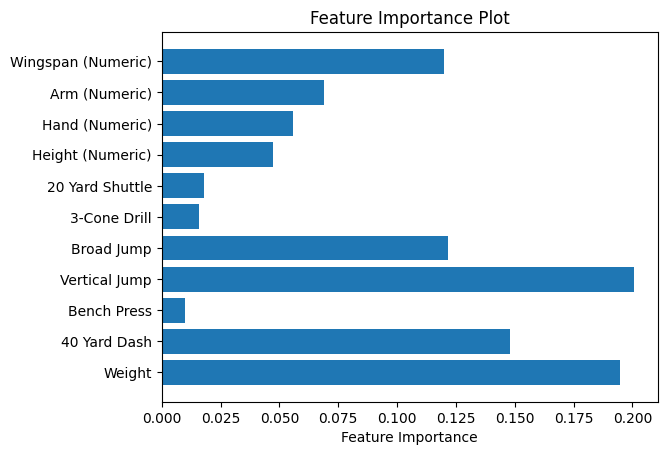

In [72]:
feature_importances = model.feature_importances_
features = X.columns

plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.show()


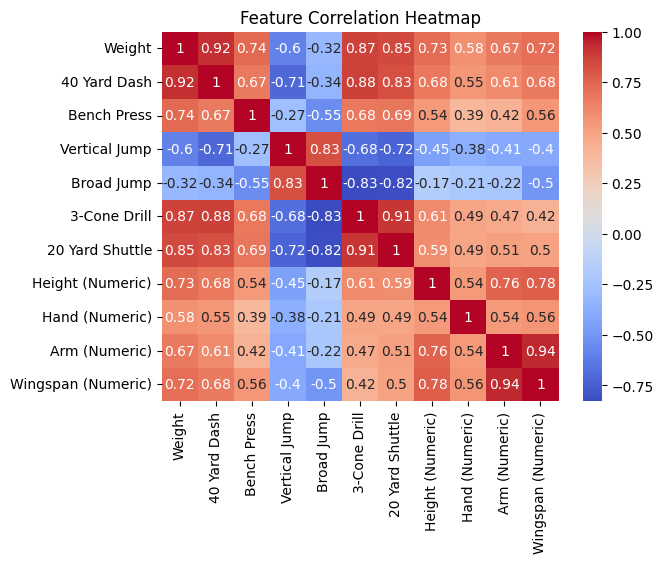

In [73]:
import seaborn as sns
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


C:\Users\noahk\AppData\Local\Temp\ipykernel_25452\800914721.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y, label="Actual", shade=True)
C:\Users\noahk\AppData\Local\Temp\ipykernel_25452\800914721.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(predictions, label="Predicted", shade=True)


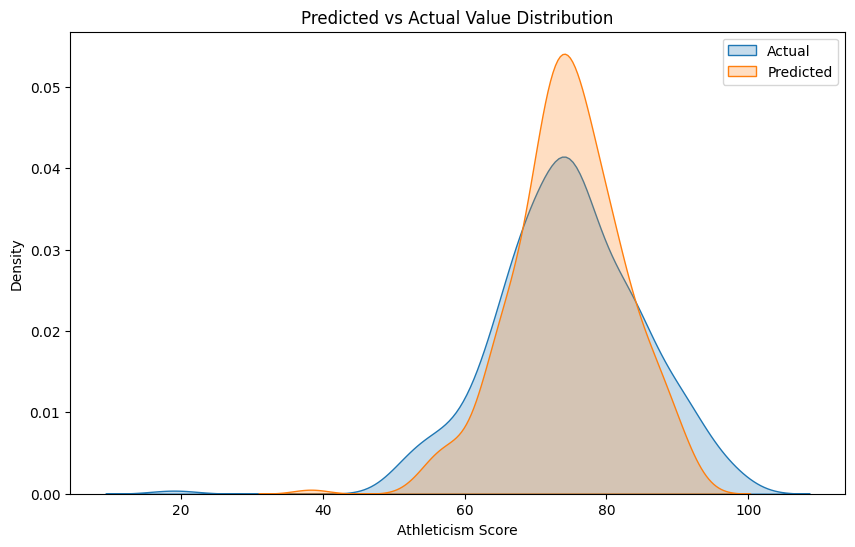

In [75]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(y, label="Actual", shade=True)
sns.kdeplot(predictions, label="Predicted", shade=True)
plt.legend()
plt.title('Predicted vs Actual Value Distribution')
plt.show()


In [1]:
print ("hello")

hello


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming `y` are the true values and `predictions` are your model's predictions
mae = mean_absolute_error(y, predictions)
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

# Plotting the predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y, predictions, alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'Predictions vs Actual (R²: {r2:.2f})')
plt.show()

# Plotting residuals
residuals = y - predictions
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


NameError: name 'y' is not defined

<Figure size 1000x600 with 0 Axes>

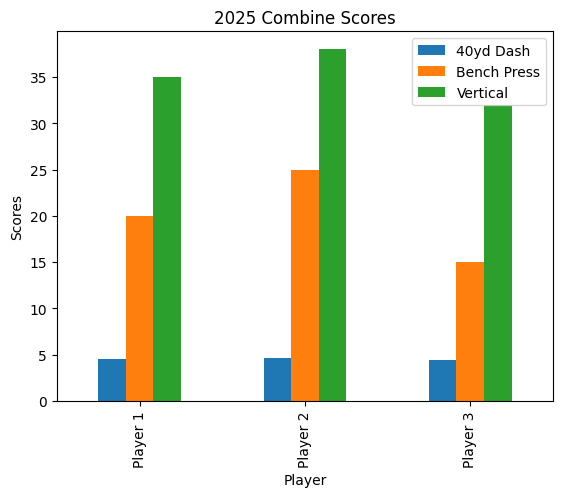

In [3]:
import pandas as pd

# Example 2025 Combine data
data = {
    'Player': ['Player 1', 'Player 2', 'Player 3'],
    '40yd Dash': [4.5, 4.6, 4.4],
    'Bench Press': [20, 25, 15],
    'Vertical': [35, 38, 32]
}

df = pd.DataFrame(data)

# Plotting the 40-yard dash, bench press, and vertical jump scores
plt.figure(figsize=(10, 6))
df.set_index('Player')[['40yd Dash', 'Bench Press', 'Vertical']].plot(kind='bar')
plt.title('2025 Combine Scores')
plt.ylabel('Scores')
plt.xlabel('Player')
plt.show()


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you have your dataset in 'X' (features) and 'y' (target) variables
X = your_dataset[['40_yard_dash', 'bench_press', 'vertical']]  # Your features
y = your_dataset['athleticism_score']  # Your target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Now you can calculate the metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print the results
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



NameError: name 'your_dataset' is not defined

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_true and y_pred are the true labels and predictions for the Boom or Bust task
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Bust", "Boom"], yticklabels=["Bust", "Boom"])
plt.title("Confusion Matrix for Boom or Bust Prediction")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Bar Plot: Distribution of predicted Boom/Bust labels
plt.figure(figsize=(8, 6))
sns.countplot(x=y_pred, palette='coolwarm')
plt.title("Distribution of Boom/Bust Predictions")
plt.xlabel("Prediction (Boom or Bust)")
plt.ylabel("Count")
plt.xticks([0, 1], ['Bust', 'Boom'])
plt.show()


NameError: name 'y_true' is not defined

In [10]:
# Print out column names to inspect them
print(df.columns)


Index(['Name', 'Position', 'School', 'Height', 'Weight', 'Hand Size',
       'Arm Length', 'Wingspan', '40 Yard Dash', 'Bench Press',
       'Vertical Jump', 'Broad Jump', '3-Cone Drill', '20 Yard Shuttle',
       'Athleticism Score', 'Height (Numeric)', 'Hand (Numeric)',
       'Arm (Numeric)', 'Wingspan (Numeric)'],
      dtype='object')


In [12]:
# Replace non-numeric values with NaN
df[['40 Yard Dash', 'Bench Press', 'Vertical Jump']] = df[['40 Yard Dash', 'Bench Press', 'Vertical Jump']].apply(pd.to_numeric, errors='coerce')


In [13]:
# Your features and target variable
X = df[['40 Yard Dash', 'Bench Press', 'Vertical Jump']]  # Features
y = df['Athleticism Score']  # Target variable

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 6.2165134041806445
Mean Squared Error: 62.920077481701526
R-squared: 0.26943682708533323


In [2]:
import joblib

# Load the trained model
model = joblib.load('athleticism_predictor_model.pkl')

import numpy as np

# Get feature importances from the trained model
importances = model.feature_importances_
features = ['40-yard dash', 'Bench press', 'Vertical']

# Plot feature importances
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title('Feature Importance for Athleticism Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


NameError: name 'plt' is not defined

In [10]:
print(df.columns)


Index(['Name', 'Position', 'School', 'Height', 'Weight', 'Hand Size',
       'Arm Length', 'Wingspan', '40 Yard Dash', 'Bench Press',
       'Vertical Jump', 'Broad Jump', '3-Cone Drill', '20 Yard Shuttle',
       'Athleticism Score', 'Height (Numeric)', 'Hand (Numeric)',
       'Arm (Numeric)', 'Wingspan (Numeric)'],
      dtype='object')


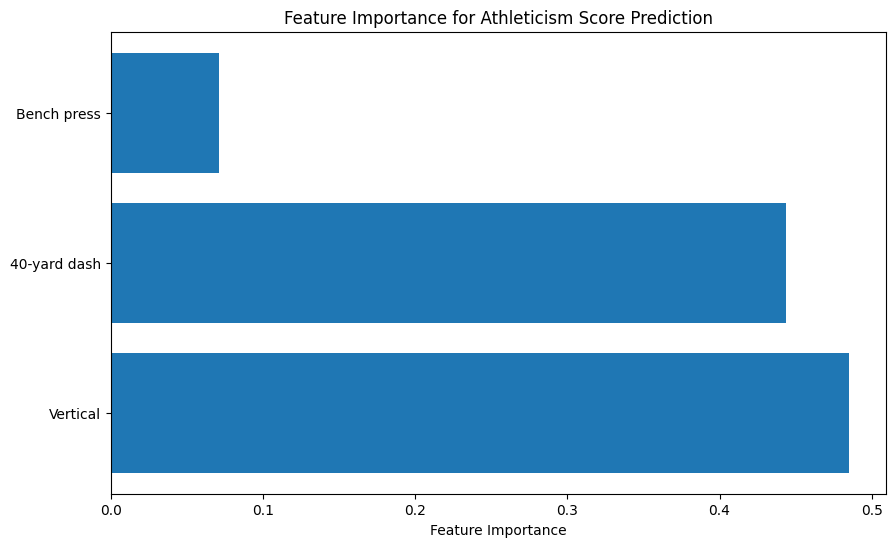

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Assuming you have your data loaded and model trained
# Use your trained model (e.g., RandomForest) to get feature importances
importances = model.feature_importances_
features = ['40-yard dash', 'Bench press', 'Vertical']

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importances[indices], align='center')
plt.yticks(range(len(features)), np.array(features)[indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Athleticism Score Prediction')
plt.show()


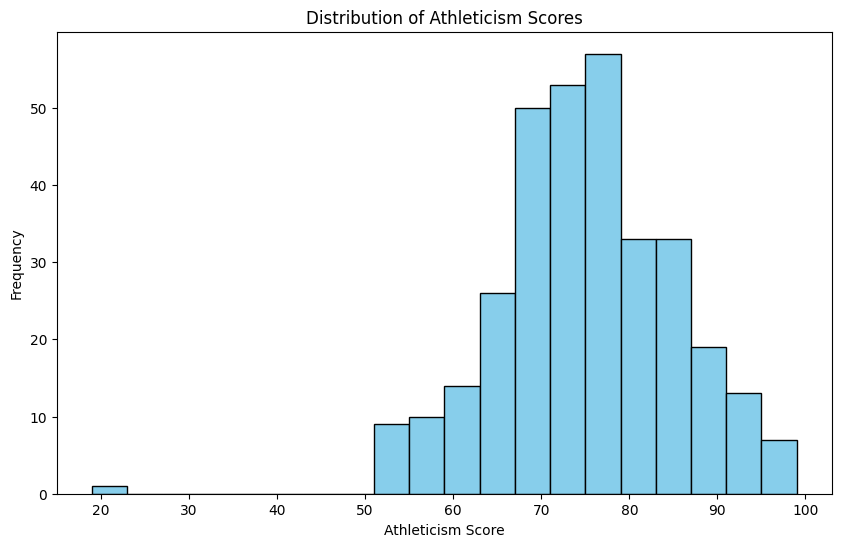

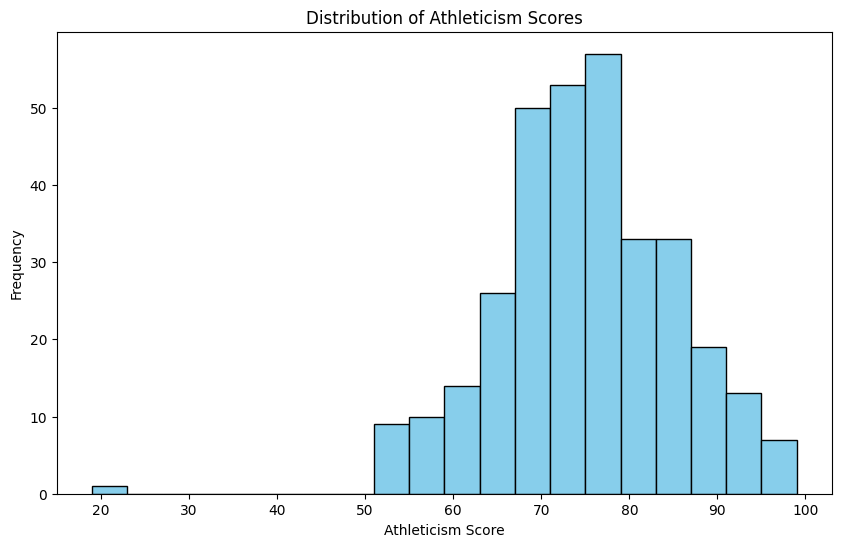

In [15]:
# Assuming 'athleticism_scores' is your target variable (Athleticism Score)
athleticism_scores = df['Athleticism Score']

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(athleticism_scores, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Athleticism Score')
plt.ylabel('Frequency')
plt.title('Distribution of Athleticism Scores')
plt.show()


plt.figure(figsize=(10, 6))
plt.hist(athleticism_scores, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Athleticism Score')
plt.ylabel('Frequency')
plt.title('Distribution of Athleticism Scores')
plt.savefig('athleticism_distribution.png')  # Save as PNG image

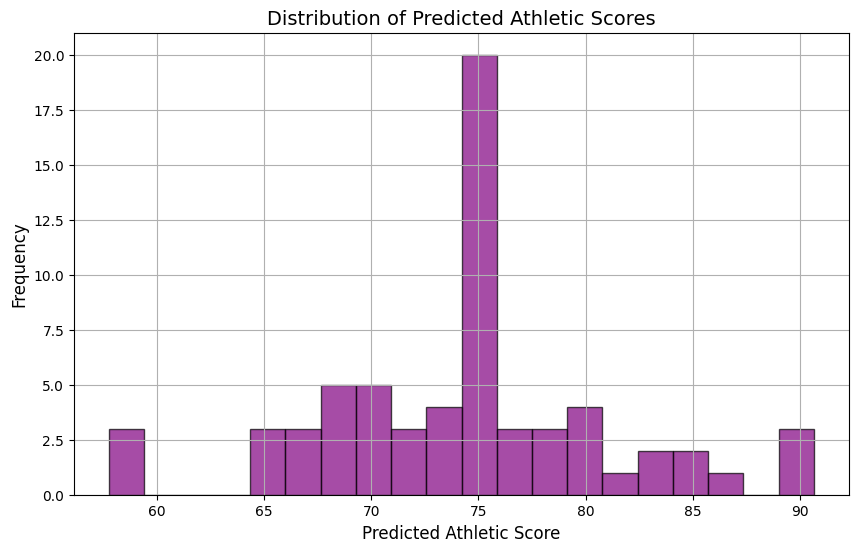

In [22]:
# Plot the distribution of predictions
plt.figure(figsize=(10, 6))
plt.hist(predictions, bins=20, color='purple', edgecolor='black', alpha=0.7)
plt.title("Distribution of Predicted Athletic Scores", fontsize=14)
plt.xlabel("Predicted Athletic Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)

# Save the plot
plt.savefig('predicted_distribution.png')

# Show the plot
plt.show()


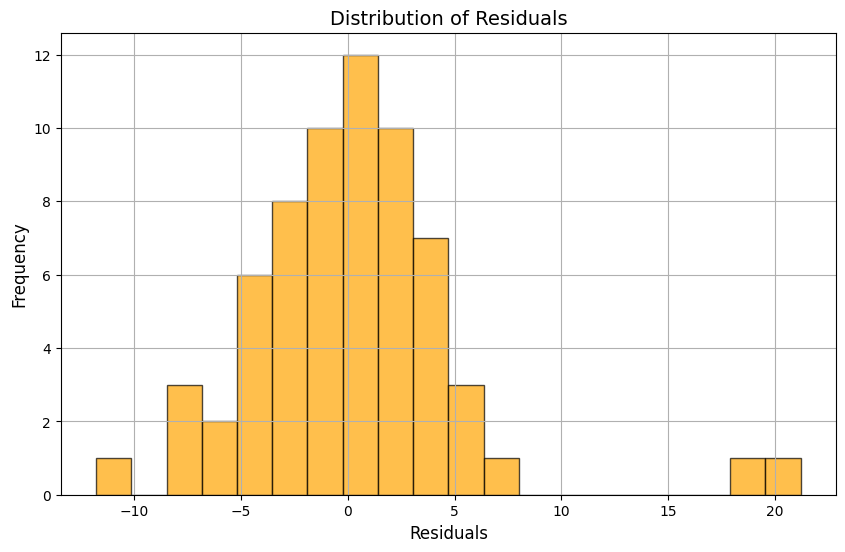

In [23]:
# Calculate residuals
residuals = y_test - predictions

# Plot histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color='orange', edgecolor='black', alpha=0.7)
plt.title("Distribution of Residuals", fontsize=14)
plt.xlabel("Residuals", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)

# Save the plot
plt.savefig('residual_distribution.png')

# Show the plot
plt.show()


In [24]:
import matplotlib.pyplot as plt
plt.hist(data['column_name'], bins=30, edgecolor='black')
plt.title('Histogram of Column Name')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


NameError: name 'data' is not defined

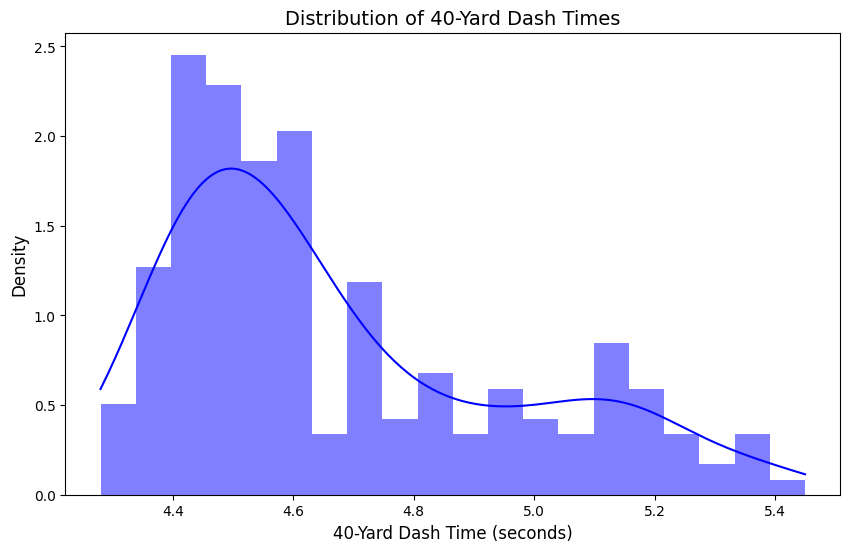

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from the Excel file
df = pd.read_excel("C:\\Users\\noahk\\OneDrive\\Desktop\\CAPSTONE\\2025 NFL Combine Dataset.xlsx")
df['40 Yard Dash'] = pd.to_numeric(df['40 Yard Dash'], errors='coerce')


# Create a histogram and KDE plot for the '40 Yard Dash' times
plt.figure(figsize=(10, 6))

# Plot histogram
sns.histplot(df['40 Yard Dash'], kde=True, bins=20, color='blue', stat="density", linewidth=0)

# Add title and labels
plt.title('Distribution of 40-Yard Dash Times', fontsize=14)
plt.xlabel('40-Yard Dash Time (seconds)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Show the plot
plt.show()


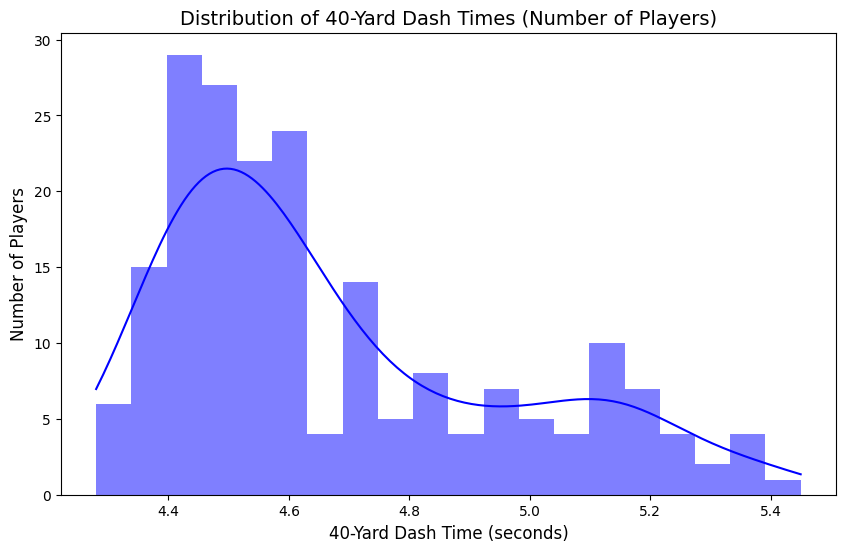

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from the Excel file
df = pd.read_excel("C:\\Users\\noahk\\OneDrive\\Desktop\\CAPSTONE\\2025 NFL Combine Dataset.xlsx")

# Ensure '40 Yard Dash' column is numeric, replace non-numeric values with NaN
df['40 Yard Dash'] = pd.to_numeric(df['40 Yard Dash'], errors='coerce')

# Drop rows with NaN values in the '40 Yard Dash' column
df_clean = df.dropna(subset=['40 Yard Dash'])

# Create a histogram and KDE plot for the '40 Yard Dash' times
plt.figure(figsize=(10, 6))

# Plot histogram with raw counts (stat="count")
sns.histplot(df_clean['40 Yard Dash'], kde=True, bins=20, color='blue', stat="count", linewidth=0)

# Add title and labels
plt.title('Distribution of 40-Yard Dash Times (Number of Players)', fontsize=14)
plt.xlabel('40-Yard Dash Time (seconds)', fontsize=12)
plt.ylabel('Number of Players', fontsize=12)

# Save the plot to a file (e.g., PNG format)
plt.savefig('40_yard_dash_distribution_players.png', dpi=300, bbox_inches='tight')

# Optionally, you can also display the plot
plt.show()
